# Week 6 - Linear Regression

## Learning Objectives
+ Introduction to Statsmodel
+ Implementing simple linear regression
+ Estimating coefficients and analyzing the model
+ Multiple Linear Regression and its difference with SLR

For this tutorial, you would need statsmodel installed on your system. You can do so using:
```
conda install -c conda-forge statsmodels
```

The tutorial is using the case study covered in the  textbook "An introduction to statistical learning: with applications in R" by James G. et al. ([link](https://link-springer-com.libproxy1.nus.edu.sg/book/10.1007/978-1-4614-7138-7)). The codes are written using this [notebook](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb) and this [notebook](https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%203.ipynb).

# Dataset

The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper. Say, you are a data analyst hired to provide advice on how to imporve sales of a particular product.

It is not possible for your client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if you determine that there is an association between advertising and sales, then you can instruct your client to adjust advertising budgets, thereby indirectly increasing sales.
In other words, your goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.

The sales is in thousands of units and advertisement budges are in thousands of dollars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
advertising = pd.read_csv('Advertising.csv', index_col=0)
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Introduction to Statsmodels

As the name implies, statsmodels is a Python library built specifically for statistics. Statsmodels is built on top of NumPy, SciPy, and matplotlib, but it contains more advanced functions for statistical testing and modeling that you won’t find in numerical libraries like NumPy or SciPy. To know more about this package follow the tutorials in this [link](https://www.statsmodels.org/stable/user-guide.html).

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

```Statsmodels``` allows users to fit statistical models using R-style formulas too. The ```formula.api``` hosts many of the same functions found in ```api``` (e.g. OLS, GLM), but it also holds lower case counterparts for most of these models. In general, lower case models accept ```formula``` and ```df``` arguments, whereas upper case ones take ```endog``` and ```exog``` design matrices.

# Simple Linear Regression

It predicts a response *Y* on the basis of a single predictor variable *X*. It assumes an approximately linear relationship between *X* and *Y*. 

We can regress sales onto TV by fitting the model:
$sales \approx \beta_{0} + \beta_{1} \times TV$

Before making predictions, we must data to estimate the coefficients. Let us plot the least squares fit for the regression of sales onto TV.

C:\Users\supar\miniconda3\envs\IT5006\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

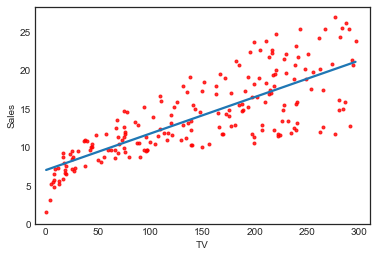

In [37]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0)

In [6]:
X = advertising[['TV']]
y = advertising[['Sales']]

est = sm.OLS(y, sm.add_constant(X)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        17:41:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        17:41:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals and assesing accuracy of model

### Residual and RSS

**Residual** ($e_{i} = y_{i}-\hat{y_{i}}$) is the difference between the $i^{th}$ observed response value and the $i^{th}$ response value that is predicted by our linear model. The least squares approach chooses the $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ to minimize the **Residual sum of squares** ($ e^{2}_{1} + e^{2}_{2} + ...$).

From the results obtained above, we can see the coefficient estimates as follows:
+ $\hat{\beta_{0}} = 7.03$
+ $\hat{\beta_{1}} = 0.0475$

In other words, an additional 1000 dollars spent on TV advertising is associated with selling approximately 47.5 additional units of the product. This is because the $\beta_{1}$ is the slope - the average increase in sales associated with a one-unit
increase in TV budget (which is in thousands of dollars).

In [8]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()

2102.5305831313512

In [9]:
est.ssr

2102.5305831313517

Besides the summary presented above, the [```OLSResults```](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLSResults.html) class in ```statsmodels``` has various attributes which can be accessed such as the RSS value.


### Residual Standard Error

Here we note that we have access to a set of observations from which we can compute the least squares line; however, the population regression line is unobserved - which would be the "true" model.

The RSS can be used to compute the residual standard error which is given by the formula:
$RSE = \sqrt{\frac{RSS}{n-2}}$

These standard errors can be used to compute hypothesis tests such as:
+ H0: There is no relationship between X and Y implying $\beta_{1} = 0$

A t-statistic is computed which helps to compute the probability of observing any number equal to $|t|$ or larger in absolute value, assuming $\beta_{1}=0$. We know this probability is the p-value. In simple words, we reject the null hypothesis—that is, we declare a relationship to exist between X and Y —if the p-value is small enough. 

In the computed OLS output, we observe that $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ are very large relative to their
standard errors, so the t-statistics are also large; the probabilities of seeing such values if H0 is true are virtually zero. Rejecting the null hypothesis, we can conclude that there is a relationship between TV and sales. From the output, we can also reject the null hypothesis that $\beta_{0} = 0$, which leads us to conclude that in the absense of TV expenditure, the sales are non-zero. 

### R-squared statistic
The $R^{2}$ statistic provides an alternative measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1, and is independent of the scale of Y.

$ R^{2} = 1 - \frac{RSS}{TSS}$

TSS measures the total variance in the response Y , and can be squares thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. An $R^{2}$ statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression.

In [10]:
print('R-squred: ', est.rsquared)

R-squred:  0.611875050850071


In [11]:
print("Residual standard error:", est.resid.std())

Residual standard error: 3.250458478006291


The RSE is found to be 3.25. In other words, actual sales in each market deviate from the true regression line by approximately 3,260 units, on average.

Now let us plot the residuals with respect to the predicted values.  

For this plot, we can use [```sns.residplot```](https://seaborn.pydata.org/generated/seaborn.residplot.html) which will regress y on x and then draw a scatterplot of the residuals. So the graph we will obtain will be a scatterplot for the residuals with the predictor variable.

C:\Users\supar\miniconda3\envs\IT5006\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV', ylabel='Sales'>

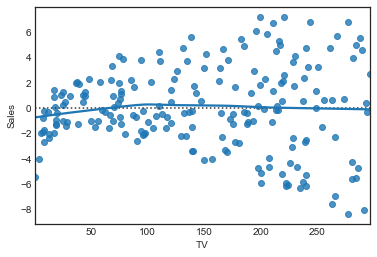

In [12]:
sns.residplot(advertising["TV"], advertising['Sales'], lowess=True, order=1)

 Ideally, this should look like a random scatter plot with zero mean and constant variance for all predicted values. Our residual plot doesn't look like an ideal residual plot. This is because the mean line of the residuals is not close to zero for all values of  $\hat{y}$ and the variance seems to be increasing with the predictor. This means that our model assumptions are being violated.
 
Among many possible reasons for this violation, the following are usual suspects:
+ There is another feature other than TV that affects sales.
+ The relation between TV and sales is not linear. 

We will implement the first fix using Multiple Linear Regression. But first let's break the model linearity assumption.

# Polynomial Regression and Heteroscedasticity

As we see, the assumption of linearity between TV and sales might not hold. However, from the residual plot, we observe more more clearly that the standard deviation of residual keeps on increasing as the magnitude of predicted response increases. This issue is called **heteroscedasticity**. To address this issue, we could transform our response variable y with functions such as $\sqrt y$, $\log(y)$. We use the concept of indicator function denoted by $I(.)$ that returns a 1 if the condition is true, otherwise returns a 0.

In [13]:
poly_est = smf.ols('np.log(Sales) ~ TV + I(TV**2)', data=advertising).fit()
poly_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Sales)   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     201.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.60e-48
Time:                        17:41:12   Log-Likelihood:                 4.1605
No. Observations:                 200   AIC:                            -2.321
Df Residuals:                     197   BIC:                             7.574
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8039      0.049     37.091      0.000       1.708       1.900
TV             0.0082      0.001     10.431      0.000       0.007       0.010
I(TV ** 2) -1.515e-05   2.62e-06     -5.773      0.000   -2.03e-05   -9.98e-06
==============================================================================
Omnibus:                       54.051   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.339
Skew:                          -1.106   Prob(JB):                     9.24e-36
Kurtosis:                       6.804   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\supar\miniconda3\envs\IT5006\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV', ylabel='Sales'>

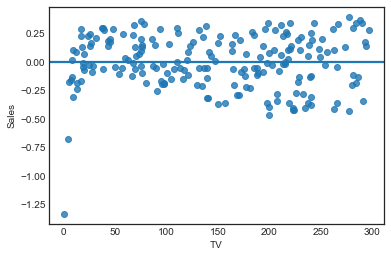

In [14]:
sns.residplot(advertising["TV"], np.log(advertising['Sales']), lowess=True, order=2)

# Performing model prediction

Let us say, the client invests 50,000 in TV budget. What would we expect our sales to be? We can use the multiple linear regression model we have estimated to do the prediction for us. 

NOTE: The sklearn library also has implementation of linear regression which can be used for such prediction. The API is the same one you are already familiar with - the ```fit```, ```transform``` and ```fit_transform``` methods for the ```sklearn.linear_model.LinearRegression```.

In [15]:
X_test = pd.DataFrame({'TV': [50]})
X_test

,TV
0,50


In [16]:
est.predict(X_test)

0    9.409426
dtype: float64

Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable. R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model. There is alternative to R-squared called adjusted R-squared that penalizes model complexity (to control for overfitting).

In general, to select the best model to use for prediction, you might want to resort to the classical cross validation. This is again easily possible using the ```sklearn``` API.

```statsmodels``` provides a function [```wls_prediction_std```](https://www.kite.com/python/docs/statsmodels.graphics.regressionplots.wls_prediction_std) that takes the result object of regression and provides the lower and upper values within which the prediction will lie with 95% confidence.

In [17]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

def get_vis_dataframe(res, X, y, ylabel='yobs', yhlabel='ypred'):
    std, upper,lower = wls_prediction_std(res)
    rvis = X.copy()
    rvis[ylabel], rvis[yhlabel]= y, res.predict(X)
    rvis['resid'], rvis['upper'], rvis['lower'] = res.resid, upper, lower
    rvis2 = pd.melt(rvis[['TV', 'ypred', 'upper', 'lower']], 'TV', var_name='Estimate')
    return rvis, rvis2

In [18]:
linvis, linvis2 = get_vis_dataframe(est, X, y)
linvis.head()

,TV,yobs,ypred,resid,upper,lower
1,230.1,22.1,17.970775,4.129225,11.513546,24.428003
2,44.5,10.4,9.147974,1.252026,2.682867,15.613081
3,17.2,9.3,7.850224,1.449776,1.371318,14.329129
4,151.5,18.5,14.234395,4.265605,7.792179,20.676611
5,180.8,12.9,15.627218,-2.727218,9.182556,22.071880


In [19]:
linvis2.head()

,TV,Estimate,value
0,230.1,ypred,17.970775
1,44.5,ypred,9.147974
2,17.2,ypred,7.850224
3,151.5,ypred,14.234395
4,180.8,ypred,15.627218


<AxesSubplot:xlabel='TV', ylabel='yobs'>

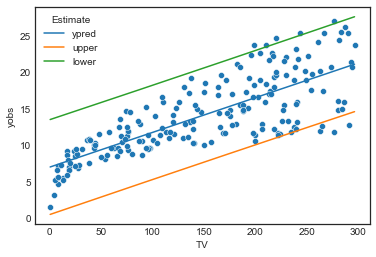

In [20]:
fig, ax = plt.subplots()

sns.scatterplot(data=linvis, x='TV', y='yobs', ax=ax)
sns.lineplot(data=linvis2, x='TV', y='value', hue='Estimate', ax=ax)

# Multiple Linear Regression

When we have more than one predictor variables, we use multiple linear regression. It essentially gives each predictor a separate slope coefficient in a single model. So, if we want to analyze if the radio and newspapers are also associated with sales, we can do a multiple linear regression as:

$sales \approx \beta_{0} + \beta_{1} \times TV + \beta_{2} \times radio + \beta_{3} \times newspaper$

Let us first do simple linear regression on these features.

In [21]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [22]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


From the simple linear regression, we can say that a 1000 dollars increase in spending on radio advertising is associated with an average increase in sales by around 203 units, while the same increase in spending on newspaper advertising is associated with an average increase in sales by around 55 units.

In [23]:
mul_est = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising).fit()

# print the coefficients
mul_est.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [24]:
print(mul_est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        17:41:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

We notice tht the multiple regression coefficient estimates for TV and Radio are pretty similar to the simple linear regression coefficients. However, while the newspaper regression coefficient estimate in SLR was significantly non-zero, the coefficient estimate for newspaper in the multiple regression model is close to zero, and the corresponding p-value is no longer significant, with a value around 0.86.

This difference stems from the fact that in the simple regression case, the slope term represents the average effect of a 1000 dollars increase in newspaper advertising, ignoring other predictors such as TV and radio. In contrast, in the multiple regression setting, the coefficient for newspaper represents the average effect of increasing newspaper spending by 1000 dollars while holding TV and radio fixed.

In [25]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


From the correlation matrix, we notice that the correlation between radio and newspaper is 0.35. This reveals a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising. Now suppose that the multiple regression is correct and newspaper advertising has no direct impact on sales, but radio advertising does increase sales. Then in markets where we spend more on radio our sales will tend to be higher, and as our correlation matrix shows, we also tend to spend more on newspaper advertising in those same markets. Hence, in a simple linear regression which only examines sales
versus newspaper, we will observe that higher values of newspaper tend to be associated with higher values of sales, even though newspaper advertising does not actually affect sales. So newspaper sales are a surrogate for radio advertising; newspaper gets “credit” for the effect of radio on sales.

## F-statistic

The F value is the ratio of the mean regression sum of squares divided by the mean error sum of squares. Its value will range from zero to an arbitrarily large number. In multiple linear regression, the null hypothesis we look at is if there is a relationship between the response and predictor.

+ H0: $\beta_{1} = \beta_{2} = \beta_{3} = ... = 0$

We can assess the accuracy of the multiple regression model.

In [26]:
print("RSE:", mul_est.resid.std())
print("R squared:", mul_est.rsquared)
print("F-statistic:", mul_est.fvalue)

RSE: 1.6727572743844117
R squared: 0.8972106381789522
F-statistic: 570.2707036590942


The large F-statistic suggests that at least one of the advertising media must be related to sales. We see that the probability of the f-statistic is close to zero, so we have extremely strong evidence that at least one of the media is associated with increased sales.

Suppose our null hypothesis is that specific coefficients are zero. The t-statistic for each predictor provide information about whether each individual predictor is related to the response, after adjusting for the other
predictors.

## Residual Plots for the multiple linear regression

Let us again plot the residual plots to visualize the trend in residuals as we did for simple linear regression. As the residplot function is not designed for the multiple linear regression, but only for simple linear regression, we will use the get_vis_dataframe function to get predictions from the model to plot.

C:\Users\supar\miniconda3\envs\IT5006\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ypred', ylabel='resid'>

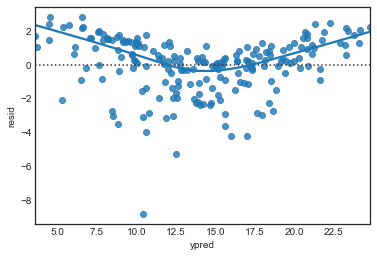

In [27]:
X = advertising[["TV", "Radio", "Newspaper"]]
y = advertising[["Sales"]]

mulvis, mulvis2 = get_vis_dataframe(mul_est, X, y)

sns.residplot(mulvis["ypred"], mulvis.resid, lowess=True, order=1)

In [28]:
predictors = ["TV", "Radio", "Newspaper"]
poly2_predictors = []
for p in predictors:
    poly2_predictors.append('{} + I({}**2)'.format(p, p))
print(poly2_predictors)

['TV + I(TV**2)', 'Radio + I(Radio**2)', 'Newspaper + I(Newspaper**2)']


In [29]:
poly_mul_est = smf.ols(formula='Sales ~'+ ' + '.join(poly2_predictors), data=advertising).fit()
print(poly_mul_est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          1.01e-101
Time:                        17:41:14   Log-Likelihood:                -364.09
No. Observations:                 200   AIC:                             742.2
Df Residuals:                     193   BIC:                             765.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4111      0.45

C:\Users\supar\miniconda3\envs\IT5006\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ypred', ylabel='yobs'>

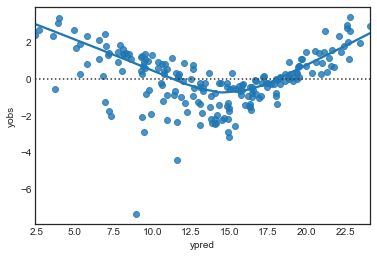

In [30]:
mulvis, mulvis2 = get_vis_dataframe(poly_mul_est, X, y)

sns.residplot(mulvis["ypred"], mulvis["yobs"], lowess=True)

C:\Users\supar\miniconda3\envs\IT5006\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ypred', ylabel='yobs'>

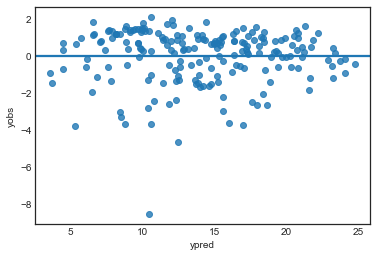

In [31]:
mulvis, mulvis2 = get_vis_dataframe(mul_est, X, y)

sns.residplot(mulvis["ypred"], mulvis["yobs"], lowess=True, order=2)

<font color="red"> Can you reason why the line is straight when using order=2 in resid plot, while our regression model does not yield the same plot despite taking second degree terms?</font>

# Practise Exercise (Optional)
1. Can you plot the 3D regression of TV and advertising on sales?
2. What would be the value of $\beta_{1}$ if the increase in TV advertising bugdet was associated with decrease in the sales?
3. For the given data, write up the analysis and answers for following questions. Use the analysis done in this tutorial to answer these questions.
    1. Is there a relationship between advertising sales and budget?
    2. How strong is the relationship?
    3. Which media contribute to sales?
    4. How large is the effect of each medium on sales?
    5. How accurately can we predict future sales?
    6. Is the relationship linear?
    7. Is there synergy among the advertising media?
4. How confidently can you say that the newspaper budget is negatively associated with sales?